In [1]:
## Import Lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
##Load CSV File
df = pd.read_csv('Covid Data.csv')
df.sample(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
73307,2,4,1,1,9999-99-99,97,2,21,2,2,...,2,2,2,2,2,2,2,2,3,97
889555,2,12,1,1,9999-99-99,97,2,54,2,2,...,2,2,2,2,2,1,2,2,7,97
458522,1,12,2,2,16/06/2020,2,1,61,97,2,...,2,2,1,2,2,2,2,2,3,2
1040154,2,12,2,1,9999-99-99,97,2,73,97,2,...,2,2,1,2,2,1,2,2,7,97
710933,1,12,1,1,9999-99-99,97,2,42,2,2,...,2,2,2,2,2,2,2,1,6,97


In [ ]:
df

In [6]:
##Print All Col:-
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [7]:
##Total Number Of Col in DataSet
len(df.columns)

21

In [ ]:
# <!-- Describe All Col:-
# NOTE:-  In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.
    
# 1)USMER:- Indicates whether the patient treated medical units of the first, second or third level.
# 2)MEDICAL_UNIT:- type of institution of the National Health System that provided the care.
# 3)SEX:- 1 for female and 2 for male.
# 4)PATIENT_TYPE:- type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
# 5)DATE_DIED:-If the patient died indicate the date of death, and otherwise indicate 9999-99-99
# 6)INTUBED:- The patient was connected to the ventilator.
# 7)PNEUMONIA:- whether the patient already have air sacs inflammation or not
# 8)AGE:-age of the patient.
# 9)PREGNANT:-whether the patient is pregnant or not.
# 10)DIABETES:-whether the patient has diabetes or not.
# 11)COPD:- Indicates whether the patient has Chronic obstructive pulmonary disease or not.
# 12)ASTHMA:-whether the patient has asthma or not.
# 13)INMSUPR:-the patient is immunosuppressed or not.
# 14)HIPERTENSION:- whether the patient has hypertension or not.
# 15)OTHER_DISEASE:- whether the patient has other disease or not.
# 16)CARDIOVASCULAR:- whether the patient has heart or blood vessels related disease.
# 17)OBESITY:- whether the patient is obese or not.
# 18)RENAL_CHRONIC:- whether the patient has chronic renal disease or not.
# 19)TOBACCO:- whether the patient is a tobacco user.
# 20)CLASIFFICATION_FINAL:- covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
# degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive
# 21)ICU:- Indicates whether the patient had been admitted to an Intensive Care Unit.
    
#  -->

In [8]:
# First separate all the columns data type wise 
##find Numeric Col:- 
numeric_column=df.columns[df.dtypes != object]
numeric_column

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [9]:
##find String Col:- 
string_column=df.columns[df.dtypes == object]
string_column

Index(['DATE_DIED'], dtype='object')

In [10]:
## Total Numeric Col & String Col
Total_Numeric_Col=len(numeric_column)
Total_String_Col=len(string_column)
print(Total_Numeric_Col)
print(Total_String_Col)

20
1


In [11]:
##Find Missing Value In DataSet:- missing value not find isnull and isna method because missing value incicate 97 or 99
for i in df.columns:
    print(i," Column in missing value:- ",df[(df[i]==97) | (df[i]==99)].shape[0])

USMER  Column in missing value:-  0
MEDICAL_UNIT  Column in missing value:-  0
SEX  Column in missing value:-  0
PATIENT_TYPE  Column in missing value:-  0
DATE_DIED  Column in missing value:-  0
INTUBED  Column in missing value:-  855869
PNEUMONIA  Column in missing value:-  16003
AGE  Column in missing value:-  221
PREGNANT  Column in missing value:-  523511
DIABETES  Column in missing value:-  0
COPD  Column in missing value:-  0
ASTHMA  Column in missing value:-  0
INMSUPR  Column in missing value:-  0
HIPERTENSION  Column in missing value:-  0
OTHER_DISEASE  Column in missing value:-  0
CARDIOVASCULAR  Column in missing value:-  0
OBESITY  Column in missing value:-  0
RENAL_CHRONIC  Column in missing value:-  0
TOBACCO  Column in missing value:-  0
CLASIFFICATION_FINAL  Column in missing value:-  0
ICU  Column in missing value:-  856032


# Working INTUBED  Column:-

In [12]:
##find missing value in INTUBED  Column:-
missing_value_INTUBED=df[(df['INTUBED']==97) | (df['INTUBED']==99)]
missing_value_INTUBED

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,9999-99-99,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [13]:
##find not missing value in INTUBED  Column:-
not_missing_value_INTUBED=df[(df['INTUBED']!=97) & (df['INTUBED']!=99)]
not_missing_value_INTUBED

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2
11,2,1,2,2,9999-99-99,2,2,24,97,2,...,2,2,2,2,2,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048553,2,13,1,2,9999-99-99,2,1,61,2,1,...,2,2,1,2,2,2,2,2,7,2
1048554,2,13,1,2,9999-99-99,2,1,63,2,2,...,1,2,2,2,2,1,2,2,7,2
1048567,1,13,1,2,9999-99-99,2,2,23,2,1,...,2,2,2,2,2,1,2,2,7,2
1048569,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2


In [22]:
##find Mode value in INTUBED  Column:-
not_missing_value_intubed_mode=not_missing_value_INTUBED['INTUBED'].mode()
not_missing_value_intubed_mode

0    2
Name: INTUBED, dtype: int64

In [26]:
##put value on Missing Value by replace mode value 
df['INTUBED']=df['INTUBED'].replace(to_replace=[97,99],value=2)

<AxesSubplot:ylabel='Frequency'>

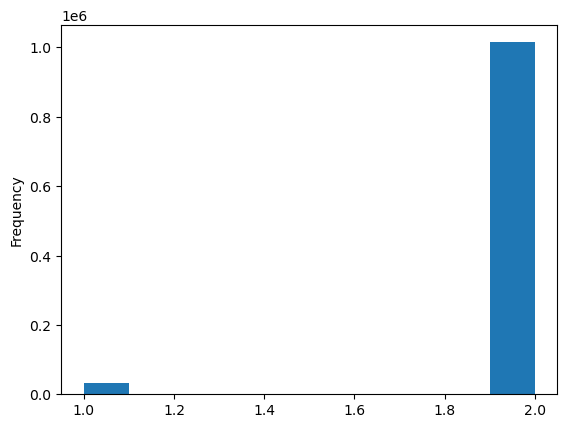

In [28]:
##Create Hist Plot on INTUBED COl:-
df['INTUBED'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

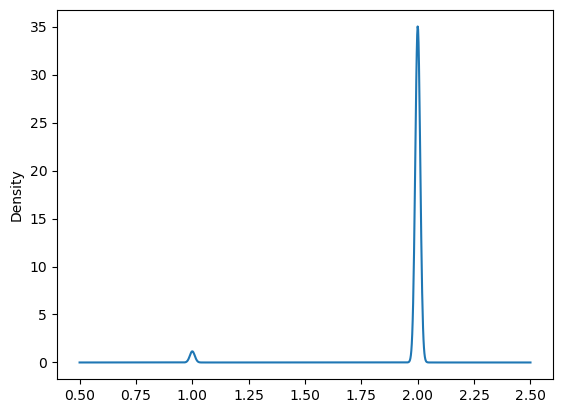

In [32]:
##Create KDE Plot on INTUBED COl:-
df['INTUBED'].plot(kind='kde')

In [33]:
##Find skew on INTUBED COl:-
df['INTUBED'].skew()

-5.3093224705819235

<AxesSubplot:>

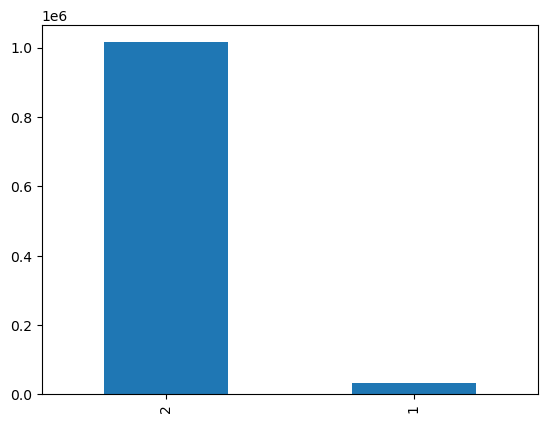

In [37]:
##Create BAR Plot on INTUBED COl:-
df['INTUBED'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='INTUBED'>

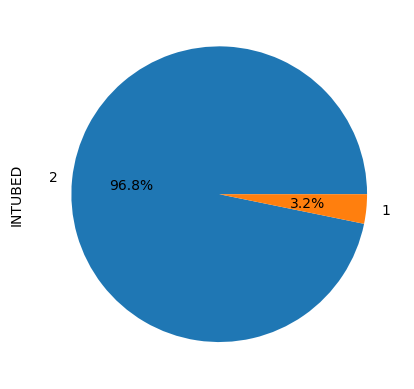

In [55]:
##Create PIE Plot on INTUBED COl:-
df['INTUBED'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [56]:
##Particular value count on INTUBED Col:-
df['INTUBED'].value_counts()

2    1014919
1      33656
Name: INTUBED, dtype: int64

# WOrking PNEUMONIA  Column:-

In [41]:
##find missing value in PNEUMONIA  Column:-
##df['PNEUMONIA']
missing_value_PNEUMONIA=df[(df['PNEUMONIA']==97) | (df['PNEUMONIA']==99)]
missing_value_PNEUMONIA

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
151,1,2,1,2,26/02/2020,2,99,1,2,2,...,2,2,2,2,2,2,2,2,7,99
169,1,2,2,1,9999-99-99,2,99,13,97,2,...,2,2,2,2,2,2,2,2,6,97
170,1,2,2,1,9999-99-99,2,99,2,97,2,...,2,2,2,2,2,2,2,2,6,97
186,1,2,1,1,9999-99-99,2,99,1,2,2,...,2,2,2,2,2,2,2,2,7,97
187,1,2,1,2,9999-99-99,2,99,13,2,2,...,1,2,2,2,2,2,2,2,7,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048162,1,13,1,2,9999-99-99,2,99,1,2,2,...,2,2,2,2,2,2,2,2,7,99
1048164,1,13,1,2,9999-99-99,2,99,12,2,2,...,2,2,2,2,2,2,2,2,7,99
1048166,1,13,2,2,9999-99-99,2,99,2,97,2,...,2,2,2,2,2,2,2,2,7,99
1048169,1,13,2,1,9999-99-99,2,99,22,97,2,...,2,2,2,2,2,2,2,2,7,97


In [42]:
##find not missing value in PNEUMONIA  Column:-
not_missing_value_PNEUMONIA=df[(df['PNEUMONIA']!=97) & (df['PNEUMONIA']!=99)]
not_missing_value_PNEUMONIA

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,2,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,2,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,2,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,2,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,2,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,2,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [43]:
##find Mode value in PNEUMONIA  Column:-
not_missing_value_PNEUMONIA_mode=not_missing_value_PNEUMONIA['PNEUMONIA'].mode()
not_missing_value_PNEUMONIA_mode

0    2
Name: PNEUMONIA, dtype: int64

In [45]:
##put value on Missing Value by replace mode value 
df['PNEUMONIA']=df['PNEUMONIA'].replace(to_replace=[97,99],value=2)

<AxesSubplot:ylabel='Frequency'>

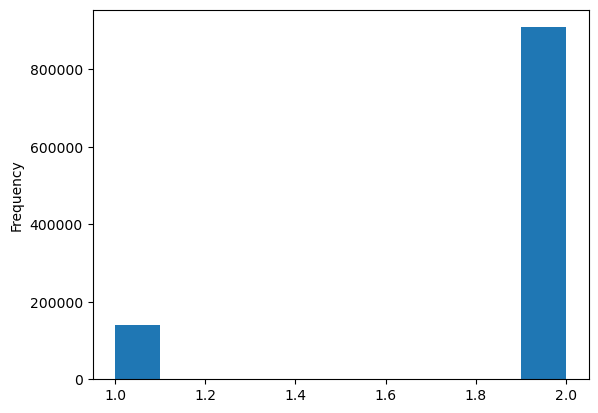

In [47]:
##Create Hist Plot on PNEUMONIA COl:-
df['PNEUMONIA'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

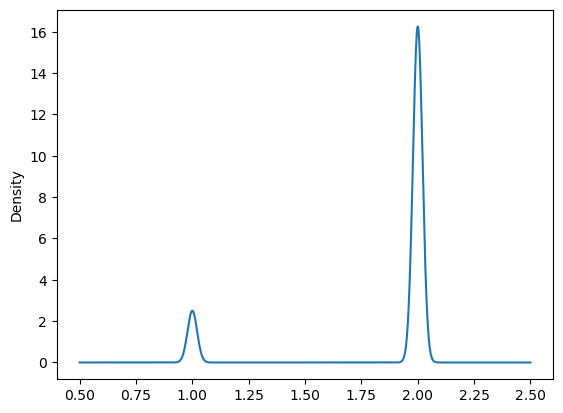

In [48]:
##Create KDE Plot on PNEUMONIA COl:-
df['PNEUMONIA'].plot(kind='kde')

In [49]:
##Find skew on PNEUMONIA COl:-
df['PNEUMONIA'].skew()

-2.154515728483538

<AxesSubplot:>

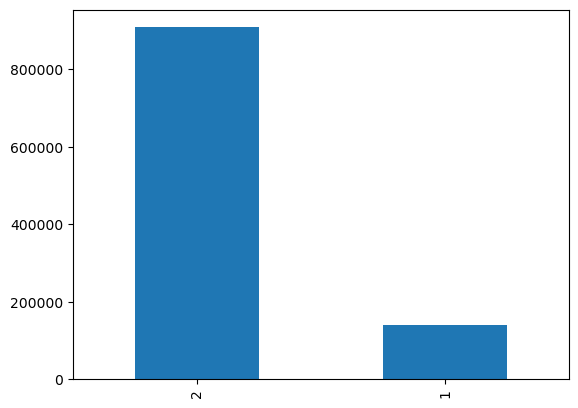

In [51]:
##Create BAR Plot on PNEUMONIA COl:-
df['PNEUMONIA'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='PNEUMONIA'>

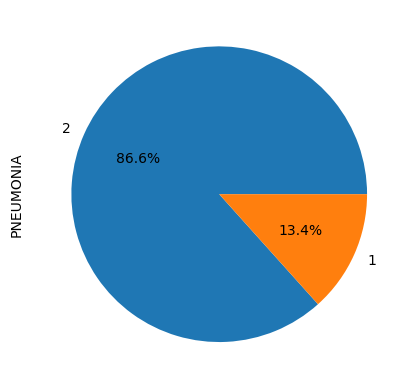

In [54]:
##Create PIE Plot on PNEUMONIA COl:-
df['PNEUMONIA'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [57]:
##Particular value count on PNEUMONIA Col:-
df['PNEUMONIA'].value_counts()

2    908537
1    140038
Name: PNEUMONIA, dtype: int64

# working on DATE_DIED Col

In [63]:
## Finf Date Of Death
date_of_death=df[df['DATE_DIED'] != "9999-99-99"]
date_of_death

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,2,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,2,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,2,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,2,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,18/07/2020,1,1,73,97,2,...,2,2,1,2,2,1,2,2,3,2
1047636,1,13,2,1,26/07/2020,2,1,82,97,2,...,2,2,1,2,2,2,2,2,3,97
1047637,1,13,1,1,27/07/2020,2,1,82,2,2,...,2,2,2,2,2,2,2,2,3,97
1047638,1,13,2,2,29/07/2020,1,1,80,97,2,...,2,2,2,2,2,1,2,2,3,2


In [61]:
## Finf Not Date Of Death
not_date_of_death=df[df['DATE_DIED'] == "9999-99-99"]
not_date_of_death

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,2,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,2,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,2,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,2,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [66]:
##put value on Missing Value by replace mode value 
df['DATE_DIED']=df['DATE_DIED'].replace(to_replace=["9999-99-99"],value="Not Died")

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,2,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,2,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,2,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,2,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,Not Died,2,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,Not Died,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,Not Died,2,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,Not Died,2,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


# Working On Age Col:-

In [9]:
## Find Missing Value on Age Col
missing_value_AGE=df[(df['AGE']==97) | (df['AGE']==99)]
missing_value_AGE

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1103,1,3,2,2,19/06/2020,2,1,97,97,2,...,2,2,2,1,2,2,2,2,6,1
1202,2,3,1,2,24/06/2020,2,1,97,2,2,...,2,2,2,2,2,2,2,2,7,2
1241,2,3,2,1,27/06/2020,97,1,97,97,2,...,2,2,2,2,2,2,2,2,3,97
15913,1,3,2,2,9999-99-99,2,2,97,97,2,...,2,2,1,2,2,1,1,2,7,2
19565,1,4,2,2,17/01/2020,99,99,99,97,2,...,2,2,2,1,2,2,2,2,7,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032804,2,12,2,1,9999-99-99,97,2,97,97,2,...,1,2,2,2,2,2,2,2,7,97
1033026,2,12,1,1,9999-99-99,97,2,99,2,2,...,2,2,2,2,1,2,2,2,7,97
1045797,2,12,2,1,9999-99-99,97,2,97,97,2,...,2,2,1,2,2,1,2,2,7,97
1046076,2,12,2,2,9999-99-99,2,2,97,97,2,...,2,2,2,2,2,2,2,2,7,2


In [10]:
##find not missing value in AGE  Column:-
not_missing_value_AGE=df[(df['AGE']!=97) & (df['AGE']!=99)]
not_missing_value_AGE

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [18]:
##find Mode value in AGE  Column:-
not_missing_value_AGE_mode=not_missing_value_AGE['AGE'].mode()
##not_missing_value_AGE_mode
##type(not_missing_value_AGE_mode)
not_missing_value_AGE_mode[0]

30

In [19]:
##put value on Missing Value by replace mode value 
df['AGE']=df['AGE'].replace(to_replace=[97,99],value=not_missing_value_AGE_mode[0])
df['AGE']

0          65
1          72
2          55
3          53
4          68
           ..
1048570    40
1048571    51
1048572    55
1048573    28
1048574    52
Name: AGE, Length: 1048575, dtype: int64

<AxesSubplot:ylabel='Density'>

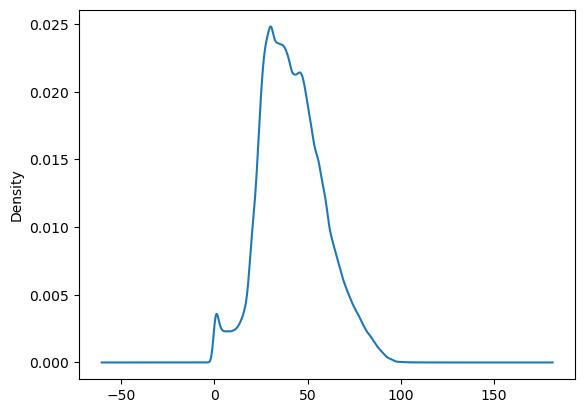

In [20]:
##Create KDE Plot on AGE COl:-
df['AGE'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

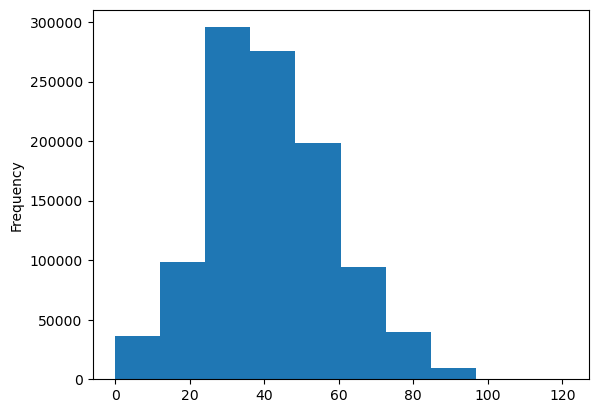

In [28]:
##Create Hist Plot on AGE COl:-
df['AGE'].plot(kind='hist')

In [31]:
##Find skew on AGE COl:-
df['AGE'].skew()

0.2772070683993101

In [22]:
##find MIN value in AGE  Column:-
not_missing_value_AGE_mean=not_missing_value_AGE['AGE'].mean()
not_missing_value_AGE_mean

41.78230063509082

In [23]:
##put value on Missing Value by replace mean value 
df['AGE']=df['AGE'].replace(to_replace=[97,99],value=not_missing_value_AGE_mean)
df['AGE']

0          65
1          72
2          55
3          53
4          68
           ..
1048570    40
1048571    51
1048572    55
1048573    28
1048574    52
Name: AGE, Length: 1048575, dtype: int64

<AxesSubplot:ylabel='Density'>

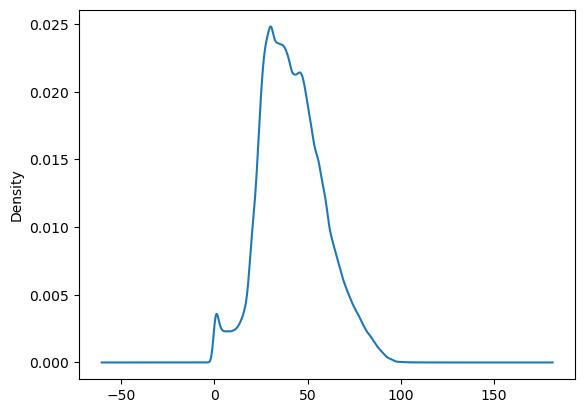

In [24]:
##Create KDE Plot on Age COl:-
df['AGE'].plot(kind='kde')

In [32]:
##Find skew on AGE COl:-
df['AGE'].skew()

0.2772070683993101

<AxesSubplot:ylabel='Frequency'>

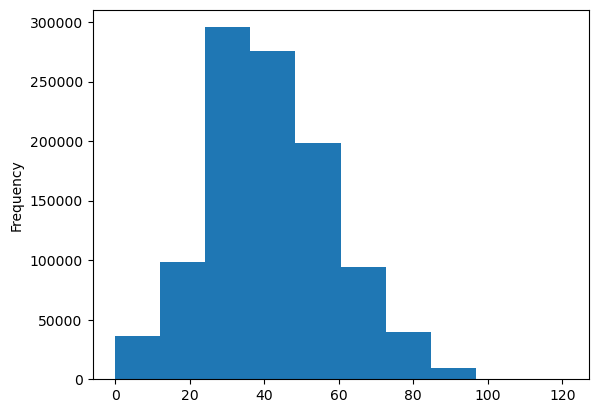

In [30]:
##Create Hist Plot on AGE COl:-
df['AGE'].plot(kind='hist')

In [25]:
##find median value in AGE  Column:-
not_missing_value_AGE_median=not_missing_value_AGE['AGE'].median()
not_missing_value_AGE_median

40.0

In [26]:
##put value on Missing Value by replace median value 
df['AGE']=df['AGE'].replace(to_replace=[97,99],value=not_missing_value_AGE_median)
df['AGE']

0          65
1          72
2          55
3          53
4          68
           ..
1048570    40
1048571    51
1048572    55
1048573    28
1048574    52
Name: AGE, Length: 1048575, dtype: int64

<AxesSubplot:ylabel='Density'>

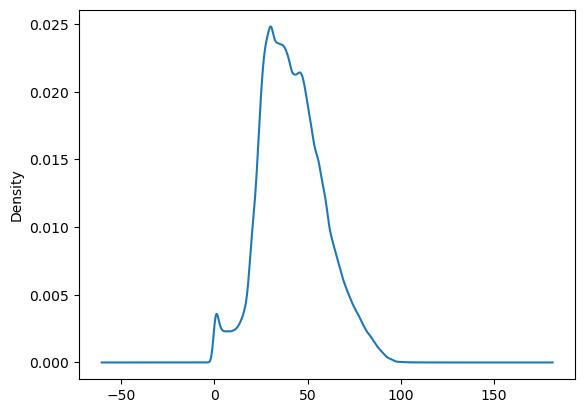

In [27]:
##Create KDE Plot on Age COl:-
df['AGE'].plot(kind='kde')

In [33]:
##Find skew on AGE COl:-
df['AGE'].skew()

0.2772070683993101

<AxesSubplot:ylabel='Frequency'>

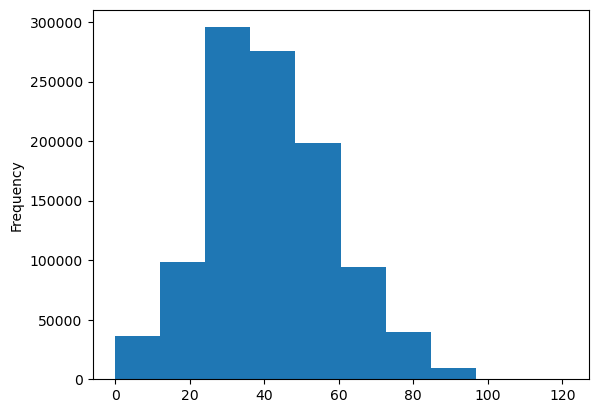

In [29]:
##Create Hist Plot on AGE COl:-
df['AGE'].plot(kind='hist')